## 분석배경
OO공장의 고객사에서 최근 들어 "Scale 불량 발생 증가"라는 이슈가 발생했다. 그 원인을 분석해 본 결과 압연공정에서 Scale불량이 급증한 것을 확인할 수 있었다. 그래서 데이터를 수집하여 다양한 분석을 통해 불량 발생의 근본 원인을 찾고 결과를 해석하여 개선 기회를 도출한다.

## 패키지 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV


In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') 

## 데이터 불러오기

In [4]:
df_raw = pd.read_csv('/home/piai/Downloads/SCALE불량.csv', encoding = 'EUC-KR')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


* Scale 발생 : `없음 - 발생`
    1. 작업시각('ROLLING_DATE)
    2. 제품 규격(SPEC)
    3. 강종(STEEL_KIND)
    4. Plate 두께(PT_THICK) : `후 - 박`
    5. Plate 폭(PT_WIDTH) : `좁음 - 넓음`
    6. Plate 길이(PT_LENGTH) : `단 - 장`
    7. Plate 중량(PT_WEIGHT) : `작음 - 큼`
    8. 가열로 호기(FUR_NO)
    9. 가열로 작업순번(FUR_NO_ROW)
    10. 가열로 가열대 온도(FUR_HZ_TEMP) : `저 - 고`
    11. 가열로 균열대 온도(FUR_SZ_TEMP) : `저 - 고`
    12. 가열로 추출 온도(FUR_EXTEMP) : `저 - 고`
    13. Hot Scale Breaker(HSB) : `적용 - 미적용`
    14. 사상 압연 온도(ROLLING_TEMP_T5) : `저 - 고`
    15. 압연간 Descaling 횟수(ROLLING_DESCALING) : `증가 - 감소`
    16. 판두께(PT_THICK) : `후 - 박`
    17. 가열로 가열대 시간(FUR_HZ_TEMP) : `단 - 장 `
    18. 가열로 균열대 시간(FUR_SZ_TEMP) : `단 - 장`
    19. 가열로 시간(FUR_TIME) : `단 - 장`
    20. 작업조(WORK_GR)

### 데이터 구성하기

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [6]:
df_raw['SPEC'].value_counts()

JS-SM490YB     84
LR-A           54
NV-A           48
PILAC-BT33     40
BV-EH36-TM     35
               ..
NK-KA32-TM      1
LR-EH32-TM      1
BV-EH32-TM      1
A131-DH36TM     1
BV-AH36-TM      1
Name: SPEC, Length: 66, dtype: int64

> 범주형 데이터인 SPEC에 66개의 label이 존재하므로 불량 생산에 영향을 주는 의미있는 결과를 얻어내기 어렵다고 판단하여  
SPEC Column은 삭제하였다

> 불량품 생산에 영향력을 미치지 않는다고 판단되는 변수인 PLATE_NO(plate번호), ROLLING_DATE(작업시각)도 삭제하였다

In [7]:
df_raw.drop(['PLATE_NO', 'ROLLING_DATE','SPEC'], axis = 1, inplace = False)

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,불량,C0,20.14,3580,38639,21870,3호기,1,1172,72,1164,62,245,1164,1005,적용,8,2조
716,양품,C0,15.08,3212,48233,18340,2호기,1,1150,61,1169,61,238,1169,947,적용,10,1조
717,양품,C0,16.60,3441,43688,19590,2호기,2,1169,65,1163,77,247,1163,948,적용,10,4조
718,양품,C0,15.59,3363,48740,80240,3호기,2,1179,86,1163,45,243,1163,940,적용,10,2조


In [8]:
df_raw.describe()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.527778,1149.666667,78.802778,300.563889,1149.666667,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,37.660799,17.571788,36.421004,45.390303,17.571788,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1113.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1132.000000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1155.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,86.000000,342.000000,1164.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,312.000000,1185.000000,294.000000,398.000000,1185.000000,1078.000000,10.000000


### 결측치 및 이상치 처리

In [9]:
#결측치 없는 것으로 확인
df_raw.isnull().sum(axis = 0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

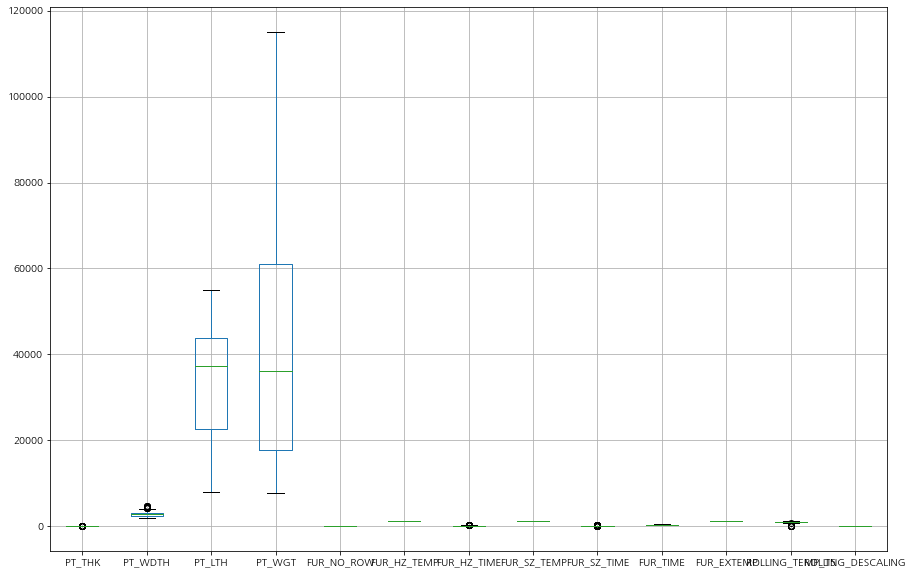

In [10]:
df_raw.boxplot(figsize = (15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63bebbdac0>,
      dtype=object)

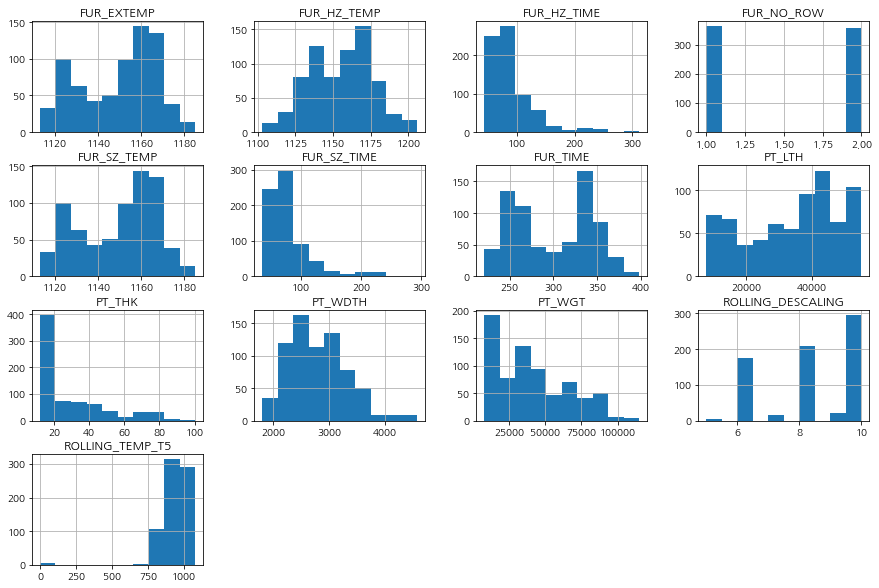

In [11]:
df_raw.hist(figsize = (15,10))

> ROLLING_TEMP_T5 column에서의 이상치 확인.  
이상치라고 판단한 이유 : 기술통계량과 히스토그램으로 데이터의 분포를 확인해본 결과 사상압연온도 데이터는 700~1000도 사이에 존재하며 압연을 하는 과정에서의 온도가 0도가 될 수는 없기 때문에 이를 이상치로 판단하고 삭제하는 과정을 진행한다

> 또한 히스토그램 분석 결과, FUR_EXTEMP와 FUR_SZ_TEMP가 동일한 형태의 모양을 보이는 것으로 나타났다.  
따라서 두 설명변수의 관계를 확인해 보도록 한다.

### ROLLING_TEMP_T5 이상치 제거

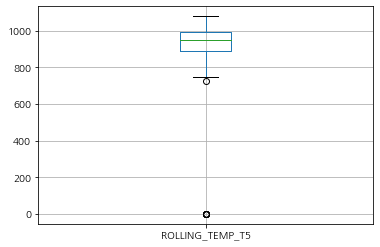

In [12]:
df_raw.boxplot(['ROLLING_TEMP_T5'])

In [13]:
##'ROLLING_TEMP_T5' 0인 값 제거

df_raw = df_raw[df_raw.loc[:,'ROLLING_TEMP_T5'] != 0]

In [14]:
df_raw[df_raw['ROLLING_TEMP_T5'] == 0]
# 이상치 제거 완료

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR


### FUR_EXTEMP,  FUR_SZ_TEMP 비교

In [25]:
df_com = df_raw['FUR_EXTEMP'] == df_raw['FUR_SZ_TEMP']
df_com.value_counts()

True    714
dtype: int64

> 두 설명변수를 확인해본 결과 FUR_EXTEMP와 FUR_SZ_TEMP가 동일한 것으로 나타났다.  
따라서 두 변수 중 FUR_SZ_TEMP만 남기고 FUR_EXTEMP는 삭제한다

In [31]:
df_raw.drop(['PLATE_NO', 'ROLLING_DATE','SPEC','FUR_EXTEMP'], axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63bd021fa0>,
      dtype=object)

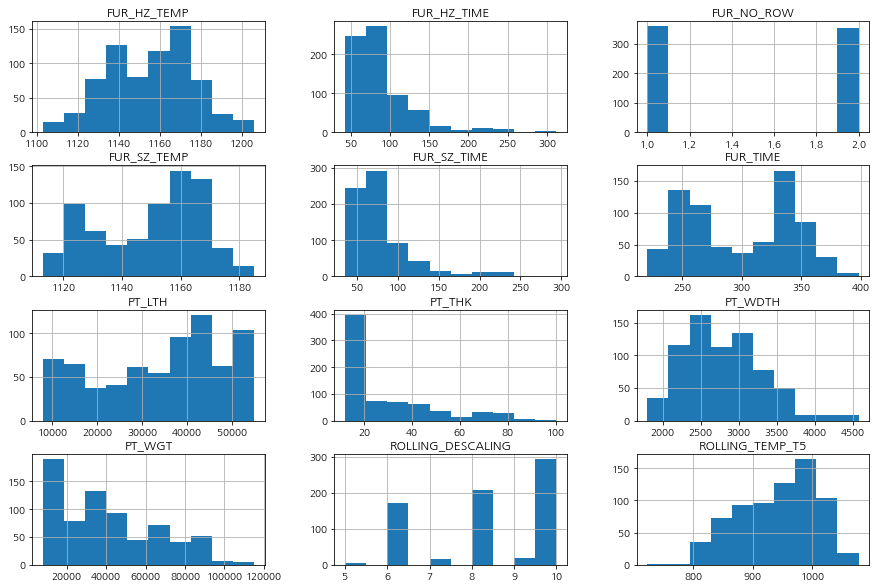

In [32]:
#히스토그램 재확인
df_raw.hist(figsize = (15,10))

### FUR_NO_ROW(가열로 작업순번) 범주형 변수로 변환 (1,2로 구성)
> 작업순번의 데이터가 1,2 두가지로 나뉘어져 있어 기존 연속형으로 되어있던 데이터 타입을 obeject로 변환하였다

In [33]:
df_raw['FUR_NO_ROW'].value_counts()

1    359
2    355
Name: FUR_NO_ROW, dtype: int64

In [34]:
df_raw['FUR_NO_ROW'] = df_raw['FUR_NO_ROW'].astype('object')

In [35]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 719
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              714 non-null    object 
 1   STEEL_KIND         714 non-null    object 
 2   PT_THK             714 non-null    float64
 3   PT_WDTH            714 non-null    int64  
 4   PT_LTH             714 non-null    int64  
 5   PT_WGT             714 non-null    int64  
 6   FUR_NO             714 non-null    object 
 7   FUR_NO_ROW         714 non-null    object 
 8   FUR_HZ_TEMP        714 non-null    int64  
 9   FUR_HZ_TIME        714 non-null    int64  
 10  FUR_SZ_TEMP        714 non-null    int64  
 11  FUR_SZ_TIME        714 non-null    int64  
 12  FUR_TIME           714 non-null    int64  
 13  ROLLING_TEMP_T5    714 non-null    int64  
 14  HSB                714 non-null    object 
 15  ROLLING_DESCALING  714 non-null    int64  
 16  WORK_GR            714 non

In [36]:
df_raw.describe()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,29.108091,2809.885154,34404.029412,41506.078431,1155.459384,88.563025,1149.774510,78.899160,300.183473,941.768908,8.327731
std,18.994878,516.293303,13799.227159,24799.277300,20.844557,37.780529,17.508271,36.551271,45.297442,65.810993,1.618317
min,12.030000,1800.000000,7893.000000,7820.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,723.000000,5.000000
25%,16.090000,2469.000000,22664.500000,17780.000000,1139.000000,65.000000,1133.000000,57.000000,257.000000,891.000000,7.000000
50%,20.130000,2727.500000,37380.000000,36090.000000,1158.000000,74.500000,1155.000000,68.000000,304.000000,952.000000,8.000000
75%,38.430000,3125.000000,43771.750000,61120.000000,1171.000000,101.000000,1164.000000,86.000000,342.000000,995.000000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,1206.000000,312.000000,1185.000000,294.000000,398.000000,1078.000000,10.000000


## 탐색적 분석

### 히스토그램으로 연속형 변수들과 목표변수의 관계 확인

In [37]:
#scale 변수 값 0,1 이라는 숫자형태의 label 로 변환
df_raw['SCALE'] = np.where(df_raw['SCALE'] == '양품', 0 ,1 )
df_raw['SCALE'].head()

0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: int64

In [38]:
#연속형 변수들만 추출하여 저장
df_raw_numeric = df_raw.select_dtypes(exclude = 'object')
df_raw_numeric.shape

(714, 12)

In [39]:
df_raw_numeric_x = df_raw_numeric.drop("SCALE", axis = 1)
df_raw_numeric_y = df_raw_numeric["SCALE"]
df_raw_numeric_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1144,116,1133,59,282,934,8
1,32.25,3707,15109,14180,1144,122,1135,53,283,937,8
2,33.27,3619,19181,18130,1129,116,1121,55,282,889,8
3,33.27,3619,19181,18130,1152,125,1127,68,316,885,8
4,38.33,3098,13334,12430,1140,134,1128,48,314,873,8


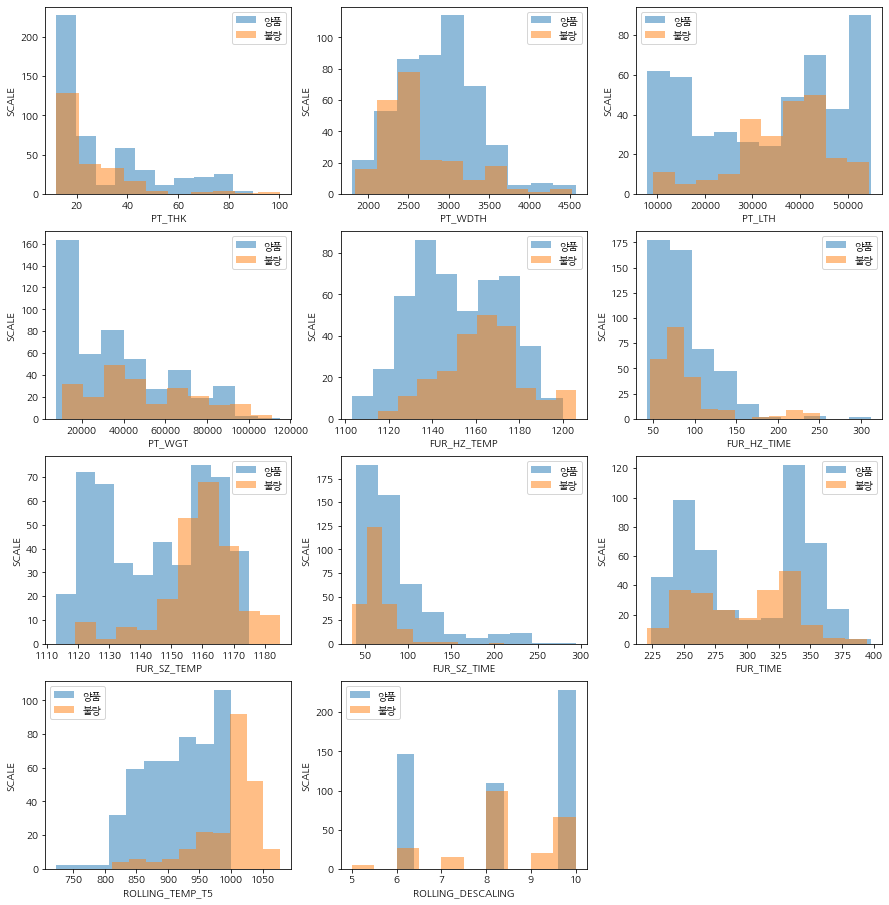

In [44]:
i = 0
fig = plt.figure(figsize = (15, 20))
columns = df_raw_numeric_x.columns
for col in columns:
    plt.subplot(df_raw_numeric_x.shape[1]//2, 3, i+1)
    i += 1
    plt.hist(df_raw[df_raw["SCALE"] == 0][col], label = "양품", alpha = 0.5)
    plt.hist(df_raw[df_raw["SCALE"] == 1][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()
plt.show()

>* plate 두께, 폭, 길이의 분포를 확인했을 때 특정 구간에서 불량품이 발생한다는 것을 확인할 수 있었다.  그러나 주문자가 요청한 plate 두께,폭, 길이는 조절할 수 있는 변수가 아니기에 vital few에 해당되지 않는다고 판단했다. 

>* 가열로 가열대 온도가 1150-1170일때 불량률이 높다.

>* 가열대 균열대 시간이 60-70 일때 불량률이 높다.

>* 가열로 시간이 275-325일때 불량률이 높다.

>* 가열로 균열대 온도가 높을수록 불량률이 높다(1155이상)

>* 압연온도가 1000 이상일때 불량률이 높다

>* 압연 중 descaling 횟수가 8-9번일때 불량률이 높다.


### 교차표로 범주형 변수와 목표변수의 관계 확인

In [45]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 719
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              714 non-null    int64  
 1   STEEL_KIND         714 non-null    object 
 2   PT_THK             714 non-null    float64
 3   PT_WDTH            714 non-null    int64  
 4   PT_LTH             714 non-null    int64  
 5   PT_WGT             714 non-null    int64  
 6   FUR_NO             714 non-null    object 
 7   FUR_NO_ROW         714 non-null    object 
 8   FUR_HZ_TEMP        714 non-null    int64  
 9   FUR_HZ_TIME        714 non-null    int64  
 10  FUR_SZ_TEMP        714 non-null    int64  
 11  FUR_SZ_TIME        714 non-null    int64  
 12  FUR_TIME           714 non-null    int64  
 13  ROLLING_TEMP_T5    714 non-null    int64  
 14  HSB                714 non-null    object 
 15  ROLLING_DESCALING  714 non-null    int64  
 16  WORK_GR            714 non

In [46]:
#범주형 변수에 따른 불량률 비교
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data['SCALE'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['SCALE'], columns = data[var], normalize = 'columns').round(3))

**가열로 호기**

In [47]:
fun_print_crosstab(df_raw, 'FUR_NO')

FUR_NO  1호기  2호기  3호기
SCALE                
0       166  166  151
1        73   70   88

FUR_NO    1호기    2호기    3호기
SCALE                      
0       0.695  0.703  0.632
1       0.305  0.297  0.368


> 호기별 불량률이 전체 불량률인 32%와 비슷한 것으로 보아 가열로 호기에 따른 불량품의 차이가 없다

**HSB 적용**

In [48]:
fun_print_crosstab(df_raw, 'HSB')

HSB    미적용   적용
SCALE          
0        0  483
1       33  198

HSB    미적용     적용
SCALE            
0      0.0  0.709
1      1.0  0.291


>HSB 를 적용하지 않았을 때 불량품의 비율 100%이다.  
이는 HSB 적용유무가 불량품 생산에 매우 큰 영향력 주는 것이라 할 수 있다.   
뿐만아니라 HSB적용시에도 불량률이 70%로 높기때문에 HSB를 적용한 데이터들을 대상으로  
 불량률에 영향을 준 다른 변수에 대한 파악이 필요하다

**작업조**

In [49]:
fun_print_crosstab(df_raw, 'WORK_GR')

WORK_GR   1조   2조   3조   4조
SCALE                      
0        121  119  115  128
1         67   45   54   65

WORK_GR     1조     2조    3조     4조
SCALE                             
0        0.644  0.726  0.68  0.663
1        0.356  0.274  0.32  0.337


> 작업조별 불량률이 전체 불량률인 32%와 비슷한 것으로 보아 작업조에 따른 불량품의 차이가 없다


**가열로 작업순번**

In [50]:
fun_print_crosstab(df_raw, 'FUR_NO_ROW')

FUR_NO_ROW    1    2
SCALE               
0           239  244
1           120  111

FUR_NO_ROW      1      2
SCALE                   
0           0.666  0.687
1           0.334  0.313


> 가열로 작업순번별 불량률이 전체 불량률인 32%와 비슷한 것으로 보아  
 작업순번에 따른 불량품의 차이가 없다

**STEEL_KIND**

In [51]:
fun_print_crosstab(df_raw, 'STEEL_KIND')

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
0           289   0   6  13  16   2  39  29  89
1           212   1   1   2   2   0   2   6   5

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
0           0.577  0.0  0.857  0.867  0.889  1.0  0.951  0.829  0.947
1           0.423  1.0  0.143  0.133  0.111  0.0  0.049  0.171  0.053


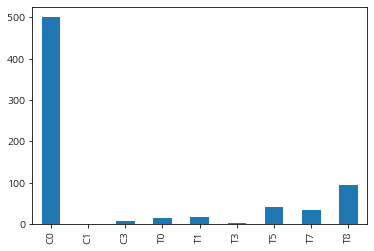

In [52]:
ds_agg = df_raw["STEEL_KIND"].value_counts()
ds_agg.sort_index(inplace = True)
ds_agg.plot.bar()

>강종에 따른 scale 생산률을 비교해보았을 때, 
강종별로 scale 생산량의 차이가 매우 컸다.  
C0에서 가장 많은 scale이 생산되었으며, 그중에서 57%는 불량인 것으로 나타났다.  
그러나 다른 강종들의 데이터 수는 C0에 비해 현저히 낮아 강종 불량품의 차이를 비교하기는 어렵다고 판단했다.  
따라서 STEEL_KIND 변수는 고려하지 않기로 했다. 


## 목표변수 형변환 (문자형 -> 숫자형)

### 데이터 분할

In [53]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print(f'shape of train data: {df_train.shape}')
print(f'shape of test data: {df_test.shape}')

shape of train data: (499, 17)
shape of test data: (215, 17)


### 변수 역할 지정


In [54]:
#get_dummies : 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
print(df_raw_dummy.shape)
#더미변수 생성된 데이터의 상위5개 row 확인
df_raw_dummy.head()

(714, 32)


,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1,FUR_NO_ROW_2,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,32.25,3707,15109,14180,1144,116,1133,59,282,...,0,0,1,0,0,1,0,1,0,0
1,0,32.25,3707,15109,14180,1144,122,1135,53,283,...,0,0,0,1,0,1,0,1,0,0
2,0,33.27,3619,19181,18130,1129,116,1121,55,282,...,1,0,1,0,0,1,0,0,1,0
3,0,33.27,3619,19181,18130,1152,125,1127,68,316,...,1,0,0,1,0,1,0,0,1,0
4,0,38.33,3098,13334,12430,1140,134,1128,48,314,...,0,1,1,0,0,1,1,0,0,0


In [55]:
df_raw_y = df_raw_dummy['SCALE']
df_raw_x = df_raw_dummy.drop('SCALE', axis = 1 , inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size = 0.3, random_state = 1234)
print(f'train data X size :{df_train_x.shape}')
print(f'train data Y size :{df_train_y.shape}')
print(f'test data X size :{df_test_x.shape}')
print(f'test data Y size :{df_test_y.shape}')

train data X size :(499, 31)
train data Y size :(499,)
test data X size :(215, 31)
test data Y size :(215,)


### Vital Few 탐색

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [59]:
#불량률에 영향을 미치지 않는 변수 삭제
df_raw1= df_raw.drop(['STEEL_KIND'],axis=1, inplace=False)

In [60]:
df_train, df_test = train_test_split(df_raw1,
                                    test_size=0.3,
                                    random_state=1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (499, 16)
test data size : (215, 16)


In [61]:
df_train.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
209,1,30.13,2288,30730,33260,3호기,2,1165,79,1158,85,291,1032,적용,8,3조
60,1,65.69,2498,11978,15430,1호기,1,1142,110,1134,73,343,851,적용,5,4조
13,0,30.23,1940,34797,16020,1호기,2,1119,130,1120,65,324,926,적용,8,4조
152,1,35.15,2466,31229,106250,1호기,2,1159,61,1162,72,303,1030,적용,8,4조
488,0,75.16,2280,15373,20680,3호기,1,1119,121,1119,70,366,878,적용,6,2조


## 로지스틱 선형 회귀

목표변수와 설명변수가 선형관계를 파악하고 목표변수에 대한 설명변수의 방향성을 파악하기 위해 로지스틱 선형 회귀 분석 사용


In [97]:
#from_formula 함수를 이용하여 변수 역할 지정
#분석 대상 이벤트 = 1
log_model = Logit.from_formula("""SCALE ~ PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO) + 
C(FUR_NO_ROW) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + ROLLING_TEMP_T5 + 
C(HSB) + C(ROLLING_DESCALING) + C(WORK_GR)""", df_train)

log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.141205
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  499
Model:                          Logit   Df Residuals:                      476
Method:                           MLE   Df Model:                           22
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.7749
Time:                        02:59:57   Log-Likelihood:                -70.461
converged:                      False   LL-Null:                       -313.05
Covariance Type:            nonrobust   LLR p-value:                 8.970e-89
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -164.5071   4.55e+04     -0.004      0.997   -8.93e+04     8.9e+04
C(FUR_NO)[T.2호기] 

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


로지스틱 회귀분석을 진행해본 결과 ROLLING_TEMP_T5, FUR_SZ_TEMP을 제외한 모든 설명변수들의 p-value 값이 모두 0.05보다 높아, 유의미한 영향을 준다고 보기 어렵다. 

array([-8.14478876e-01,  2.60386889e-01,  8.84091622e-02, -3.53680947e+01,
       -4.21366763e+01, -1.43695815e+00, -3.83730814e+01,  1.88851022e+00,
       -3.85216510e+01, -7.64553820e-01, -1.11170922e+00, -8.14362589e-01,
        1.52105986e-01, -2.39978658e-03, -5.69014714e-05, -1.26828924e-05,
        2.40723454e-02,  8.92364099e-03,  1.33213152e-01, -3.01798385e-02,
       -3.82281469e-03,  6.53162899e-02])

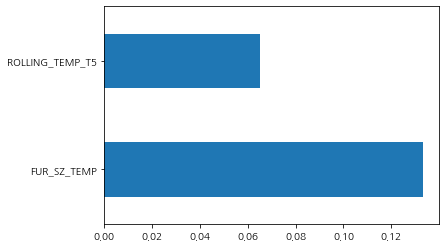

In [101]:
df_log_coef = pd.DataFrame({"Coef":[log_result.params.values[19],log_result.params.values[22]]},
                                 index = [log_model.exog_names[19],log_model.exog_names[22]])
df_log_coef.plot.barh(y="Coef",legend=False)
log_result.params.values[1:]

> 중요도를 고려해본 결과, FUR_SZ_TEMP가 가장 영향이 크며 그다음은 ROLLING_TEMP_T5 이다.

## 의사결정나무

In [66]:
df_temp = df_raw
#df_temp["ClusterHierarhcical"] = ds_temp["ClusterHierarchical"].astype('str')
df_dummy = pd.get_dummies(df_temp)
df_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1,FUR_NO_ROW_2,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,32.25,3707,15109,14180,1144,116,1133,59,282,...,0,0,1,0,0,1,0,1,0,0
1,0,32.25,3707,15109,14180,1144,122,1135,53,283,...,0,0,0,1,0,1,0,1,0,0
2,0,33.27,3619,19181,18130,1129,116,1121,55,282,...,1,0,1,0,0,1,0,0,1,0
3,0,33.27,3619,19181,18130,1152,125,1127,68,316,...,1,0,0,1,0,1,0,0,1,0
4,0,38.33,3098,13334,12430,1140,134,1128,48,314,...,0,1,1,0,0,1,1,0,0,0


In [67]:
df_y = df_dummy["SCALE"]
df_x = df_dummy.drop("SCALE", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (499, 31)
train data Y size : (499,)
test data X size : (215, 31)
test data Y size : (215,)


In [68]:
tree_final = DecisionTreeClassifier(min_samples_leaf=20)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(min_samples_leaf=20)

In [69]:
#평가
y_pred = tree_final.predict(df_test_x)
print(tree_final.score(df_test_x, df_test_y))
print(confusion_matrix(df_test_y, y_pred))

0.9441860465116279
[[142   2]
 [ 10  61]]


### 변수 중요도

In [70]:
#변수명 저장
v_feature_name = df_train_x.columns

#나무를 만들 때 사용되는 변수들의 중요도
#feature_importances_ : 설명변수의 중요도
#tree_final, feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

#df_feature_importance 의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,ROLLING_TEMP_T5,0.669
25,HSB_미적용,0.206
6,FUR_SZ_TEMP,0.085
0,PT_THK,0.031
10,ROLLING_DESCALING,0.008
18,STEEL_KIND_T7,0.001
3,PT_WGT,0.000
28,WORK_GR_2조,0.000
27,WORK_GR_1조,0.000
26,HSB_적용,0.000


Text(0, 0.5, '설명변수')

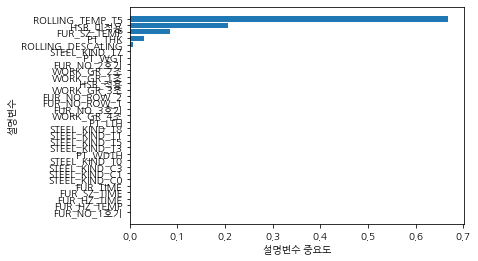

In [71]:
#설명변수 중요도 그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

>* 전체 설명변수의 중요도를 확인해본 결과 압연온도(Rolling temp t5)가 불량품 분류 의사결정모델에 가장 큰 영향을 미치는 것으로 나타났다.
>* HSB 적용과 FUR_SZ_TEMP의 영향력 또한 큰 것으로 보인다. 
>* 이후 다른 변수들의 영향력을 알아보기위해 random forest와 gradient boosting 도 진행하였다.   

## 랜덤 포레스트

In [72]:
#모델 생성
rf_final = RFC(random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.944


In [73]:
y_pred = rf_final.predict(df_test_x)
print('Accuracy: {0:3f}\n'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.944186

Confusion matrix : 
[[144   0]
 [ 12  59]]


In [74]:
#변수명 저장
v_feature_name = df_train_x.columns

#나무를 만들 때 사용되는 변수들의 중요도
#feature_importances_ : 설명변수의 중요도
#tree_final, feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

#df_feature_importance 의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,ROLLING_TEMP_T5,0.310
6,FUR_SZ_TEMP,0.107
1,PT_WDTH,0.067
25,HSB_미적용,0.064
26,HSB_적용,0.053
10,ROLLING_DESCALING,0.052
4,FUR_HZ_TEMP,0.049
0,PT_THK,0.044
2,PT_LTH,0.042
3,PT_WGT,0.040


Text(0, 0.5, '설명변수')

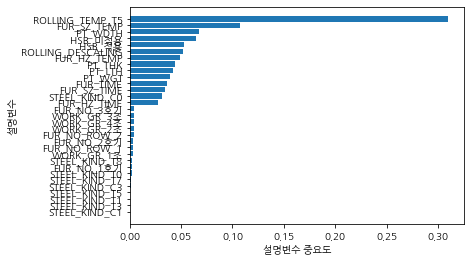

In [75]:
#설명변수 중요도 그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

>* 랜덤포레스트 모델을 통해 전체 설명변수의 중요도를 확인해본 결과 압연온도(Rolling temp t5)가 불량품 분류모델에 가장 큰 영향을 미치는 것으로 나타났다.
>* FUR_S2_temp의 영향력 또한 큰 것으로 보인다. 
>* HFB의 적용여부도 불량품 분류모델에 미치는 영향력이 큰 것으로 보인다.

## Gradient Boosting

In [77]:
#모델 생성
gb_final = GBC(random_state = 1234)
gb_final.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.972


In [78]:
y_pred = gb_final.predict(df_test_x)
print('Accuracy: {0:3f}\n'.format(gb_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.972093

Confusion matrix : 
[[144   0]
 [  6  65]]


In [79]:
#변수명 저장
v_feature_name = df_train_x.columns

#나무를 만들 때 사용되는 변수들의 중요도
#feature_importances_ : 설명변수의 중요도
#tree_final, feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

#df_feature_importance 의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,ROLLING_TEMP_T5,0.581
6,FUR_SZ_TEMP,0.120
26,HSB_적용,0.091
25,HSB_미적용,0.088
10,ROLLING_DESCALING,0.051
0,PT_THK,0.041
1,PT_WDTH,0.008
4,FUR_HZ_TEMP,0.008
7,FUR_SZ_TIME,0.004
8,FUR_TIME,0.002


Text(0, 0.5, '설명변수')

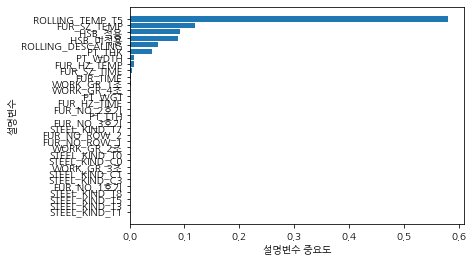

In [80]:
#설명변수 중요도 그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

>* 랜덤포레스트 모델을 통해 전체 설명변수의 중요도를 확인해본 결과 압연온도(Rolling temp t5)가 불량품 분류모델에 가장 큰 영향을 미치는 것으로 나타났다.
>* 그 이후로는 HFB의 적용여부가 불량품 분류모델에 미치는 영향력이 큰 것으로 보인다.  
>* FUR_S2_temp와 rollling_descaling의 영향력 또한 큰 것으로 보인다. 

### 로지스틱 회귀분석, 의사결정나무, 랜덤 포레스팅, 그래디언트 부스팅 4가지 방법으로 설명변수의 중요도를 파악한 결과
### 불량품 발생에 영향을 미치는 Vital Few는 아래와 같다.
> 1. ROLLING_TEMP_T5(압연 온도)
2. HSB 
> 3. FUR_SZ_TEMP(가열로 균열대 온도)
> 4. ROLLING_DESCALING(압연 중 Descaling 횟수)

### 위의 설명변수만을 추출하여 최종 모델 결정을 위한 의사결정나무 모델링을 진행했다

## 최종 모델 결정을 위한 의사결정나무

In [81]:
df_train_x=df_train_x[['ROLLING_TEMP_T5', 'HSB_미적용','HSB_적용', 'FUR_SZ_TEMP', 'ROLLING_DESCALING']]
df_test_x=df_test_x[['ROLLING_TEMP_T5', 'HSB_미적용','HSB_적용', 'FUR_SZ_TEMP', 'ROLLING_DESCALING']]

In [82]:
df_train_x.shape

(499, 5)

In [83]:
tree_uncustomized=DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
# Train 데이터 정확도
print('Accuracy on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x,df_train_y)))
# Test 데이터 정확도
print('Accuracy on test set:{:.3f}'.format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.986


In [84]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

### 모델 parameter 조정
### max_depth: 최대 깊이 변경에 따른 모델 성능

In [85]:
#max_depth: 최대 깊이 변경에 따른 모델 성능
#train 및 test 설명력 결과 저장
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 1234,
                                 max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

#결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.890,0.888
1,2,0.938,0.921
2,3,0.966,0.953
3,4,0.976,0.953
4,5,0.976,0.953
5,6,0.982,0.967
6,7,0.986,0.953
7,8,0.988,0.944
8,9,1.000,0.986
9,10,1.000,0.986


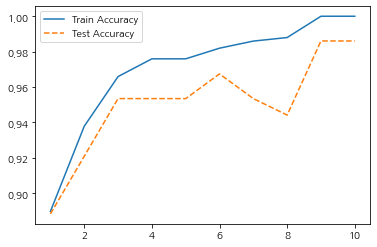

In [86]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = "--", label = 'Test Accuracy')
plt.legend()

> 최대 깊이가 길어질 수록 모델의 정확도는 증가하지만 8에서는 감소하는 형태를 보인다.  
> 따라서 가장 정확도가 높은 6을 최대 깊이로 정하였다.

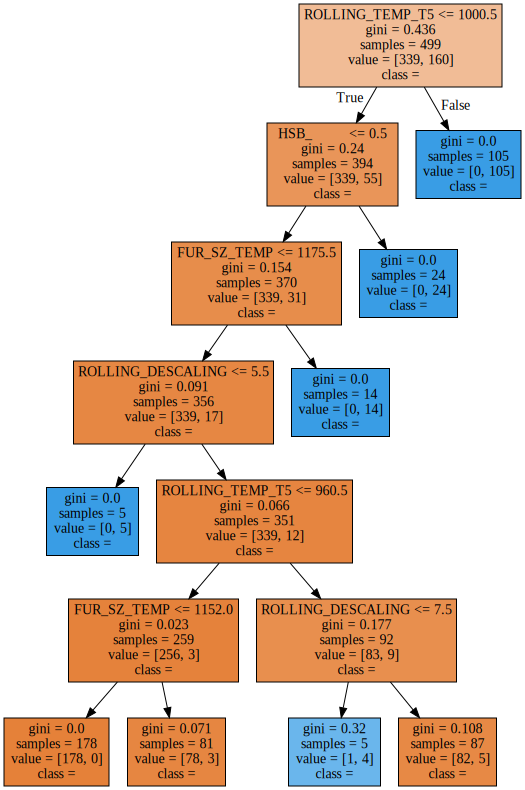

In [87]:
#변수명 저장
v_feature_name = df_train_x.columns

#최대 깊이 = 4 모델
tree_low = DecisionTreeClassifier(max_depth = 6,random_state = 1234)
tree_low.fit(df_train_x , df_train_y)

#트리 모델을 tree_low.dot 파일로 저장(목표변수 , 0: 양품, 1:불량)
export_graphviz(tree_low, out_file = 'tree_low.dot', class_names = ['양품', '불량'], 
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [88]:
#train 및 test 설명력 결과 저장
train_accuracy = []
test_accuracy = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234,
                                 max_depth = 6,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['Trainaccuracy'] = train_accuracy
df_score_split['Testaccuracy'] = test_accuracy
df_score_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.982,0.967
1,20,0.982,0.967
2,30,0.982,0.967
3,40,0.982,0.967
4,50,0.982,0.967
5,60,0.982,0.967
6,70,0.982,0.967
7,80,0.982,0.967
8,90,0.982,0.967
9,100,0.976,0.953


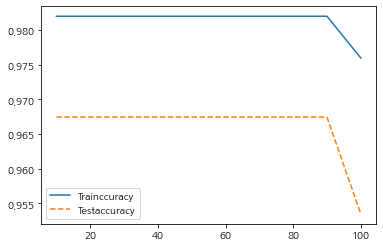

In [89]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = 'Trainccuracy')
plt.plot(para_split, test_accuracy, linestyle = "--", label = 'Testaccuracy')
plt.legend()

> 모델의 정확도는 분리 노드의 갯수에 크게 영향을 받지 않는 것으로 보이므로 고려 대상에서 제외하였다.

### min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [90]:
#train 및 test 설명력 결과 저장
train_accuracy = []
test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234 , min_samples_leaf = v_min_samples_leaf,
                                  max_depth = 6)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainAccuracy'] = train_accuracy
df_score_leaf['TestAccuracy'] = test_accuracy
#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.982,0.967
1,4,0.982,0.967
2,6,0.982,0.986
3,8,0.982,0.986
4,10,0.966,0.953
5,12,0.966,0.953
6,14,0.966,0.953
7,16,0.962,0.949
8,18,0.952,0.944
9,20,0.952,0.944


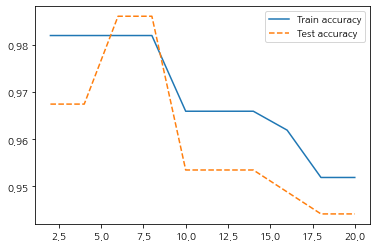

In [91]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = 'Train accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = 'Test accuracy')
plt.legend()

> 잎사귀 노드의 최소 자료수 증가에 따라 모델의 설명력은 감소하는 형태를 보인다.  
> 따라서 모델의 정확도가 가장 높은 6로 잎사귀 노드의 최소 자료수를 정하였다

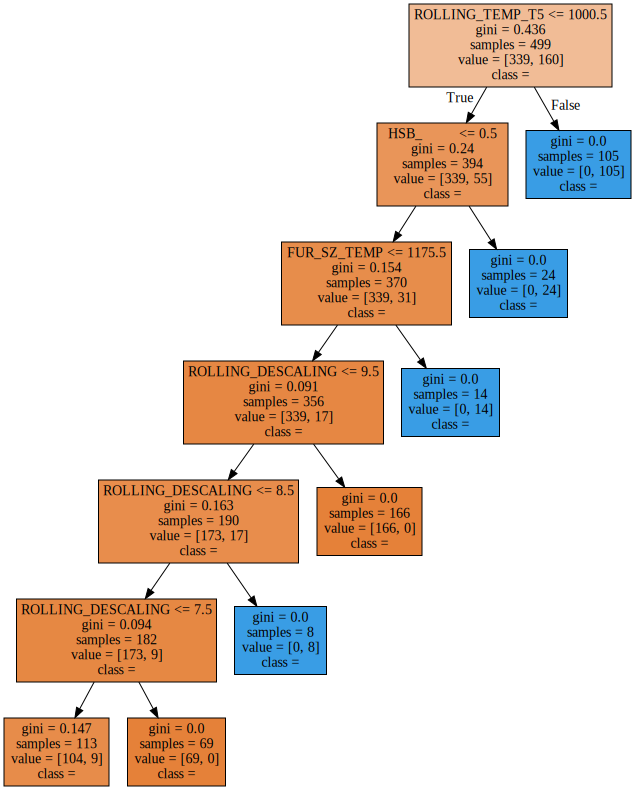

In [92]:
#변수명 저장
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 8 모델
tree_low = DecisionTreeClassifier(random_state = 1234, min_samples_leaf = 6,max_depth = 6,
                                  min_samples_split = 20)
tree_low.fit(df_train_x , df_train_y)
export_graphviz(tree_low, out_file = 'tree_low.dot', class_names = ['양품','불량'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 최종 모델 선정

In [93]:
#모델 생성
tree_final = DecisionTreeClassifier(min_samples_leaf = 6, max_depth = 6, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Score on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on training set : 0.982
Score on test set : 0.986


### 최종 모델 시각화

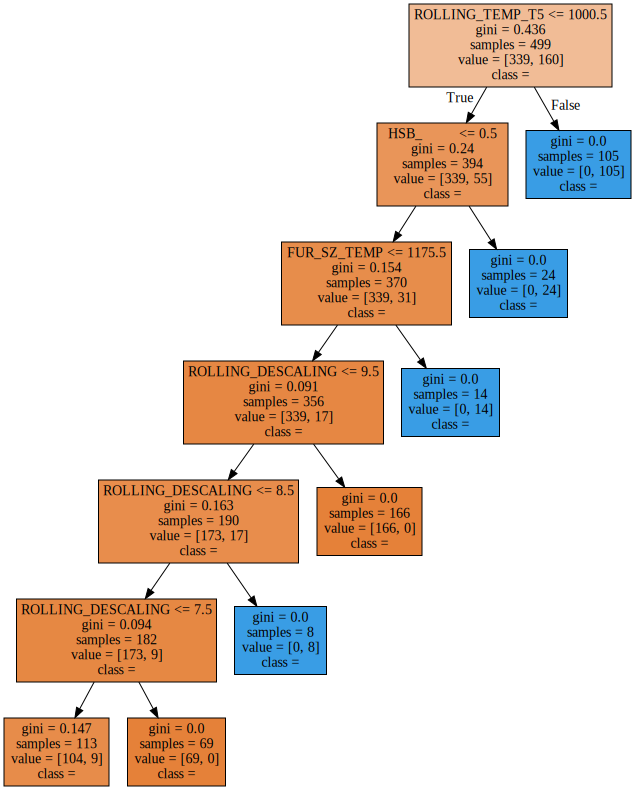

In [94]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 6, max_depth = 6, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

export_graphviz(tree_final, out_file = 'tree_final.dot', class_names = ['양품','불량'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [96]:
import pydot
(graph,) = pydot.graph_from_dot_file('tree_final.dot',encoding='utf8')
graph.write_png('decisionTree.png')

> 의사결정나무를 통해 압연온도가 scale 불량 발생에 미치는 영향이 크다는 것을 확인할 수 있었다.


## 최종 모델 평가

In [95]:
y_pred = tree_final.predict(df_test_x)
print('Accuracy: {0:3f}\n'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.986047

Confusion matrix : 
[[144   0]
 [  3  68]]


> 최종 모델의 정확도는 98%로 이전에 비해 개선된 것을 알 수 있다

## 결론 도출 및 개선안

### 최종 모델을 통해 scale 불량 발생을 줄이기 위한 개선 방법 3가지를 도출했다.
    1. scale 공정 시 ROLLING_TEMP_T5(압연온도)를 1000.5도 이하로 낮춘다.
    2. HSB를 적용하되, HSB 적용에도 불량률이 높은 점을 고려하여 적용 후 FUR_SZ_TEMP(가열로 균열대 온도)를 1175.5도 이하로 낮춘다. 
    3. ROLLING_DESCALING(압연 중 Descaling 횟수)를 9회 이하로 줄인다.



데이터 정제의 어려움
 하지만 많은 시도를 통해 데이터 전처리의 중요성을 알 수 있엇음 설명 변수들 간의 연관성을 이해하며 예측방법을 배울 수 있었음 .데이터 정제부터 모든 과정을 통해 한눈ㅇ 데이터 분석의 과정을 이해하며 관점을 뱅루 ㅅ ㅜ이
 
'데이터분석의 80%는 데이터 전처리'라는 말을 이해하게 되는 데이터 분석 과제였다. 각 변수들의 특성을 파악하고 문제를 인식하고 이를 해결하기 위해 데이터 전처리를 진행하면서 그 중요성에 대해 알게 되었다. 설명변수의 데이터타입에 따라 다른 종류의 그래프를 사용하여 분석을 진행하고 의미있는 vital few를 찾아가는 과정 속에서 변수들 간의 연관성을 찾아가며 문제를 해결해나갈 수 있었다. 모델링을 통해 분류를 진행하고 이를 개선하기 위한 개선점을 찾아내는 모든 과정 속에서 데이터 분석의 과정을 이해하며 그 관점을 배울 수 있었다.